In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

%matplotlib inline

In [4]:
# !apt-get update 
# !apt-get install g++ openjdk-8-jdk python-dev python3-dev 
# !pip3 install JPype1-py3 
# !pip3 install konlpy 
# !JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

In [5]:
# # 한글 폰트 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic')

# # %matplotlib inline

In [6]:
!pip install gensim

In [7]:
import nltk
import gensim
from gensim.models import word2vec


In [8]:
from konlpy.tag import Komoran
kor = Komoran()

In [9]:
from wordcloud import WordCloud

In [10]:
os.listdir('./연관성분석')

['df01.csv',
 'df02.csv',
 'df03.csv',
 'df04.csv',
 'df05.csv',
 'df06.csv',
 'df07.csv',
 'df08.csv',
 'df09.csv',
 'df10.csv',
 'df11.csv',
 'df12.csv']

In [11]:
# # 글자 폰트
# path='/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [12]:
# 불용어 제거
import re

def text_clean(doc):
    doc=re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣  ]'," ",doc)
    return doc

In [137]:
# ss= pd.read_csv('./drive/MyDrive/텍스트마이닝/stopwords-ko.txt')
# sw = [ s[0] for s in ss.values]

ss= pd.read_csv('stopwords-ko-old.txt')
sw = [ s[0] for s in ss.values]

In [138]:
# df2019 = pd.read_csv('./drive/MyDrive/텍스트마이닝/news_data_2019.csv', index_col=0)
# df2019 = df2019.reset_index(drop=False, inplace=False)
# df2019 = df2019.drop(['level_0','index'], axis=1)

df2019 = pd.read_csv('news_data_2019.csv', index_col=0)
df2019 = df2019.reset_index(drop=False, inplace=False)
df2019 = df2019.drop(['level_0','index'], axis=1)

# df01 = df_2019[df_2019['date'].str.contains('2019.01')]
# df02 = df_2019[df_2019['date'].str.contains('2019.02')]
# df03 = df_2019[df_2019['date'].str.contains('2019.03')]
# df04 = df_2019[df_2019['date'].str.contains('2019.04')]
# df05 = df_2019[df_2019['date'].str.contains('2019.05')]
# df06 = df_2019[df_2019['date'].str.contains('2019.06')]
# df07 = df_2019[df_2019['date'].str.contains('2019.07')]
# df08 = df_2019[df_2019['date'].str.contains('2019.08')]
# df09 = df_2019[df_2019['date'].str.contains('2019.09')]
# df10 = df_2019[df_2019['date'].str.contains('2019.10')]
# df11 = df_2019[df_2019['date'].str.contains('2019.11')]
# df12 = df_2019[df_2019['date'].str.contains('2019.12')]

In [139]:
df2019.shape

(11170, 4)

In [140]:
df2019.head()

,date,category,title,contents
0,2019.01.01 09:41,컴퓨팅,"꿈꾸는 돼지해, 시민이 바라는 2019년의 IT 세상은?",\n[디지털투데이 석대건 기자] 시민들이 바라는 2019년의 IT 세상은 소박했다....
1,2019.01.02 09:23,산업,"[4차산업 만난 굴뚝산업⑪] 선풍기, 시원함-따뜻함 동시에 돌린다",\n[디지털투데이 고정훈 기자] 지난 여름은 유독 무더웠다. 거리는 뜨겁게 달아올랐...
2,2019.01.04 08:20,인터넷,"커가는 웹툰 업계, '구심점'이 없네","\n[디지털투데이 유다정 기자] 웹툰 시장이 급격히 성장하고 있으나, 업계 이슈 대..."
3,2019.01.01 09:23,인터넷,'혜리 효과' 다방 콜 시도 40%↑...새해에도 연예인 마케팅 지속,\n[디지털투데이 유다정 기자] 다방이 2019년에도 '혜리 효과'를 노린다. 혜리...
4,2019.01.02 08:24,종합,"스타트업이 '꿈꾸는 내일', 쉽게 도달하지 못하는 이유는?","\n[디지털투데이 이길주 기자] 세상에 없던 것들을 생각하고 만들며, 도전을 하는 ..."


# 2019 전체 연관성분석

In [141]:
# contents=[]

# count=0

# for i, j in enumerate(df2019['contents']):
    
#     data = text_clean(j) # 데이터 전처리
    
#     kor_no= kor.nouns(data)  # komoran을 이용하여 명사 추출
    
#     clean_text = [token for token in kor_no if token not in sw]  # 추출된 명사에서 불용어 제거 후 리스트 작성
    
#     ko= nltk.Text(clean_text)
    
#     most=ko.vocab().most_common(10)
    
#     contents.append(most)
    
#     count+=1
    
#     print(i, end=' ')

# contents


In [247]:
contents2019=[]

count=0

for i, j in enumerate(df2019['contents']):

  data=text_clean(j)

  kor_no= kor.nouns(data)

  clean_text=[token for token in kor_no if token not in sw]

  contents2019.append(clean_text)

  count+=1

  print(count, end=' ')


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 

3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 

5142 5143 5144 5145 5146 5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 

6784 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798 6799 6800 6801 6802 6803 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 

8425 8426 8427 8428 8429 8430 8431 8432 8433 8434 8435 8436 8437 8438 8439 8440 8441 8442 8443 8444 8445 8446 8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 

java.lang.NullPointerException: java.lang.NullPointerException

In [246]:
len(contents2019)

0

In [144]:
#!pip install mlxtend

In [245]:
import mlxtend

In [248]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [249]:
from mlxtend.frequent_patterns import association_rules

In [250]:
te = TransactionEncoder()
te_result = te.fit(contents2019).transform(contents2019)

In [251]:
for i in te.columns_:
    print(i)

가가
가가 국
가가 번
가감
가게
가격 차별
가격 투명성
가격 파괴
가격표
가결
가경
가계부
가계부채
가고시마
가공
가공식품
가공업자
가공품
가관
가교
가구
가구라
가구점
가구주
가금
가까이
가나
가나다순
가나안
가난
가남읍
가네코
가늠
가니
가니쉬
가닥
가담
가담자
가덕도
가도
가독성
가동
가두
가둠
가드
가든
가든파이브
가디
가디건
가디언
가디언스
가디언즈
가라아게
가락
가락동
가람
가렌
가려움증
가로
가로등
가로세로
가로수
가로수길
가루
가루다
가르니에
가르시아
가르침
가마
가마솥
가망
가맹
가맹업
가맹점
가메
가면
가면무도회
가명
가무
가문
가뭄
가미
가바
가발
가방
가변
가변 밸브 타이밍
가보
가부
가부장
가브리엘
가비
가비아
가사
가사도
가산
가산동
가상
가상 공간
가상 머신
가상 세계
가상공간
가상현실
가상화
가석방
가설
가설물
가성
가세
가속
가속기
가속도
가속도계
가속도센서
가솔린
가수
가수왕
가스
가스관
가스레인지
가스실
가슴
가슴팍
가습기
가습기 살균제
가습기 살균제 사건
가시
가시광선
가시밭길
가시연
가식
가신
가십
가압류
가액
가야
가약
가양주
가업
가업 승계
가에
가역
가연성
가열
가오
가오리
가오슝
가옥
가온미디어
가와
가와사키
가요
가요제
가용
가용성
가우
가우스
가운
가원
가위
가위바위보
가은
가을
가을 여행
가을동화
가을로
가을밤
가을철
가의
가이
가이던스
가이드
가이드라인
가이드북
가이아
가이즈
가인
가일
가입국
가입비
가자
가자미
가장
가장자리
가재
가전
가전사
가전제품
가정법원
가정생활
가정용 게임기
가정용품
가정위탁
가정주부
가정집
가정폭력
가정환경
가제
가젯
가족
가족 사진
가족력
가족사
가족사진
가족장
가족캠프
가주
가죽
가중
가중치
가지
가지마오
가짓수
가짜
가차
가창
가창력
가책
가처분
가천
가천대학교
가체
가축
가출
가치
가치관
가치나
가칭
가톨릭
가톨릭관동대학교
가톨릭대
가톨릭대학교
가트
가트너
가파도
가판대
가평
가평군
가풍
가프
가해
가해자
가행
가호
가화
각개
각계
각계각층
각고
각광
각국
각권
각급
각기

기요
기욤
기용
기우
기운
기원
기유
기윤
기인
기일
기입
기자 주
기자단
기자실
기자재
기자회견
기장
기장군
기장읍
기재
기저
기저 대역
기저귀
기적
기적을
기전
기전력
기절
기점
기정
기정동
기정사실
기조
기조실장
기조연설
기종
기주
기준
기준선
기준일
기증
기증자
기지
기지개
기지국
기질
기집
기차
기차역
기차표
기철
기체
기초
기초과학
기초과학연구원
기초자산
기초지방자치단체
기축
기축 통화
기치
기침
기타 구
기타 연주자
기타로
기타리스트
기탁
기통
기틀
기판
기포
기폭제
기품
기풍
기프
기프트
기프트카드
기피
기하
기하급수
기하학
기학
기한
기함
기항
기해
기행
기현
기현상
기협
기형
기호
기호식품
기혼자
기화
기회
기획
기획관
기획단
기획단장
기획력
기획부
기획부장
기획사
기획서
기획실장
기획위
기획자
기획전
기후
기후 변화
기흉
기흥
기흥구
기흥휴게소
긱스
긴급
긴급 체포
긴급조치
긴급회의
긴박
긴자
긴장감
긴축
길가
길가메시
길거리
길고양이
길동
길드
길드워
길만
길목
길바닥
길병원
길상면
길음역
길이
길잡이
길주로
김가영
김가은
김갑환
김강
김강현
김건
김건모
김건우
김건희
김겨울
김경
김경남
김경도
김경동
김경란
김경록
김경만
김경모
김경미
김경민
김경선
김경수
김경일
김경준
김경진
김경철
김경태
김경표
김경협
김경호
김경훈
김경희
김계관
김고은
김관
김관영
김광
김광삼
김광석
김광섭
김광수
김광식
김광욱
김광주
김광진
김광현
김교현
김구
김규동
김규리
김규철
김규현
김규화
김규환
김근
김기남
김기동
김기범
김기석
김기선
김기성
김기수
김기열
김기영
김기용
김기웅
김기주
김기준
김기철
김기현
김기호
김기훈
김길태
김나연
김나영
김나진
김나현
김낙순
김난도
김남수
김남숙
김남식
김남주
김남진
김남호
김남훈
김남희
김대
김대겸
김대기
김대성
김대식
김대엽
김대우
김대원
김대유
김대익
김대중
김대중 정부
김대중컨벤션센터
김대진
김대현
김대형
김대환
김대희
김덕
김덕기
김덕수
김덕용
김덕현
김도경
김도균
김도엽
김도우
김도욱
김도현
김도형
김도환
김

늦봄
늦여름
늪
늪지
니
니나
니다
니데
니드
니드라이
니들
니모
니미
니사
니스
니시
니아
니야
니어
니엘
니오르
니요
니즈
니즈와
니지
니카라과
니케
니켈
니코
니코 로스베르크
니코틴
니콘
니콜
니콜 키드먼
니콜라예프
니콜라이
니트
니혼게이자이
니혼게이자이신문
닉
닉 카터
닉스
닌자
닌텐도
닐
닐 암스트롱
닐센
닐슨
님
님과 함께
님비
닛산
닛산 로그
닛산 알티마
다 크루
다 펌프
다각
다각도
다각형
다과
다구
다국어
다국적
다국적 기업
다그
다기
다기능
다나
다나까
다나와
다나카
다날
다낭
다년
다년간
다노 정
다누
다누리
다뉴브
다니엘
다다
다단계
다당류
다대포항
다도
다라
다락
다래
다량
다레
다롄
다로
다른 나라에서
다름슈타트
다리
다리미
다린
다림
다마스쿠스
다매체
다면
다모
다목적
다목적 경기장
다목적실용위성
다문화가정
다반사
다발
다방
다방면
다변
다보
다보스
다비
다비드
다비치
다빈치
다사다난
다산
다산네트웍스
다섯 손가락
다세대
다소간
다솜
다수기
다수표
다스
다승왕
다시
다시 구
다시 시작해
다시마
다식
다신
다실
다양
다양성
다오
다와
다용도
다용도실
다우
다우 존스
다우기술
다우니
다우존스
다운
다운 주
다운로드
다운사이징
다운타운
다운타임
다원
다윈
다음날
다이
다이고
다이나믹스
다이나톤
다이내믹스
다이너마이트
다이너스
다이너스티
다이노스
다이렉
다이렉트 드라이브
다이브
다이빙
다이소
다이스
다이슨
다이아
다이아몬드
다이애나
다이어그램
다이어리
다이어터
다이어트
다이얼
다이얼로그
다이오드
다이제스트
다인
다임
다임러
다자
다자간
다재
다저스
다중
다중 사용자
다중 프로그래밍
다중경로
다중작업
다중접속
다중화
다지기
다짐
다차
다채널
다층
다카
다카르
다카시
다케시
다케시마
다쿠아즈
다큐멘터리
다크
다크 판타지
다크호스
다툼
다트
다트머스 대학교
다품종
다행
다향
다혈질
다홍치마
다회
다희
닥나무
닥스
닥터
닥터 마리오
닥터 스트레인지
닥터스
단 레이
단가
단거리
단검
단결
단계
단골
단골손님
단골집
단과
단국대
단군
단군의 땅
단기


랜섬웨어
랜스
랜턴
랠리
램버스
램지
램페이지
램프
랩소디
랩터
랭커
랭크
랭킹
러그
러너
러너웨이
러닝
러버
러브
러브 스토리
러브레터
러브스토리
러브콜
러셀
러스트
러시
러시아
러시아 그랑프리
러시아 연방보안국
러시아 요리
러시아어
러시아워
러시아의 주
러크나우
러키
러프
럭비
럭비 월드컵
럭스
런
런 현
런닝
런닝맨
런던
런던대
런웨이
런치박스
런치패드
런타임
런타임 라이브러리
레거시
레거시 시스템
레겐스부르크
레고
레고 그룹
레고랜드
레깅스
레나
레노
레노버
레녹스
레다
레드
레드 강
레드 데드 리뎀션
레드 드래곤
레드 라인
레드닷 디자인 어워드
레드락
레드베터
레드벨벳
레드불
레드아이
레드카펫
레드햇
레드햇 엔터프라이즈 리눅스
레디
레디스
레딧
레만
레모네이드
레몬
레미
레미콘
레바
레반트
레버리지
레베카
레벨
레벨 업
레볼루션
레브
레비
레서판다
레스
레스코
레스터
레스토랑
레슬링
레시
레아
레알
레어
레오
레오나드
레오나르도
레오나르도 디카프리오
레온
레옹
레우스
레위
레위니옹
레이
레이나
레이노
레이니
레이다
레이더
레이드
레이디
레이디 가가
레이디스
레이디와 트램프
레이몬드
레이밴
레이븐
레이블
레이서
레이스
레이시온
레이싱
레이싱 모델
레이아웃
레이어
레이온
레이저
레이저 포인터
레이저라이트
레이즈
레이지
레이첼
레이캅코리아
레이캬비크
레이크
레이클린 테크놀로지
레이턴
레인
레인보우
레인보우 식스
레인저
레인지
레일
레일리
레저
레저 주
레전드
레져
레조
레종
레즈
레즈비언
레지
레지나
레지던트
레지던트 이블
레지스탕스
레지스터
레지스트리
레진코믹스
레체
레츠고
레코
레코드
레퀴엠
레크
레크레이션
레크리에이션
레터
레토
레트로
레트로 게임
레티나 디스플레이
레페
레포츠
레포트
레프
레플리카
렉서스
렉스
렉스 리
렉시
렉시스
렉시오
렌더링
렌더링 엔진
렌더팜
렌디
렌스
렌즈
렌카
렌터카
렌트
렌트카
력
로 섬
로거
로건
로고
로고스필름
로그
로그인
로기
로나
로널드 피셔
로더
로데오
로듐
로드
로드리게스
로드맵
로드스터
로드아일랜드
로디
로디아

바라
바라본다
바라지
바랄
바람
바람개비
바람둥이
바람막이
바람의 나라
바람이 분다
바랑
바램
바렐라
바로 가기
바로미터
바로크
바륨
바르
바르게
바르셀로나
바른
바른손
바리
바리스타
바리스타 커피
바리톤
바미
바바
바바라
바바리안
바버
바버라
바벨
바보
바비
바비큐
바빌론
바사
바세나르
바순
바스
바스크
바스티아
바스프
바실리스크
바야돌리드
바오
바오딩
바오밥
바욘
바우
바운드
바운스
바운티
바위
바이
바이 구
바이 주
바이너리
바이노럴 비트
바이두
바이러스
바이브
바이브레이션
바이블
바이스
바이어
바이어스
바이오
바이오매스
바이오메트릭스
바이오센서
바이오쇼크
바이오스
바이오칩
바이오하자드
바이오하자드 시리즈
바이올렛
바이올리니스트
바이올린
바이올린 협주곡
바이유
바이컴
바이크
바이킹
바이트
바인
바일
바자르
바자회
바지
바지락
바지선
바질
바캉스
바코드
바퀴
바퀴벌레
바크
바클레이스 센터
바키
바타
바탕
바텐더
바톨로
바통
바트
바티
바티스타
바틱
바흐
박강
박건
박건우
박건태
박결
박경
박경리
박경수
박경완
박경호
박경훈
박과
박광온
박구윤
박근형
박근혜
박근혜 정부
박기량
박기석
박기원
박길연
박나래
박남옥
박닌
박달
박대연
박대출
박대호
박도현
박동
박동민
박동석
박동수
박동혁
박두병
박두용
박두을
박람회
박람회장
박력
박령우
박막
박만영
박명
박명관
박명석
박명수
박명순
박무
박문각
박문성
박물관
박미선
박미숙
박미영
박민
박민수
박민영
박민우
박민정
박범집
박병기
박병대
박병엽
박병주
박병호
박보검
박보경
박보미
박보영
박빙
박사
박삼구
박상
박상건
박상국
박상규
박상길
박상영
박상욱
박상일
박상조
박상준
박상진
박상철
박상혁
박상현
박상호
박상훈
박상희
박서준
박석원
박석희
박선미
박선숙
박선영
박성
박성광
박성균
박성민
박성빈
박성수
박성용
박성원
박성일
박성준
박성철
박성하
박성현
박성호
박성화
박성희
박세동
박세라
박세민
박세준
박소담
박소연
박수
박수갈채
박수근
박수영
박순
박순철
박스
박스 세트
박스오피스
박승
박승원
박승준
박신혜
박양

서성
서세옥
서소문
서소문로
서수경
서수길
서술
서스펜션
서식
서식지
서식지 파괴
서신
서씨
서아프리카
서안
서약
서약서
서약식
서양
서양호
서연
서연이화
서열
서영
서영수
서영애
서영은
서영주
서영진
서예
서예가
서예지
서용석
서우
서울
서울 삼성 썬더스
서울 시민청
서울 지하철
서울가정법원
서울경제
서울고
서울고등법원
서울고법
서울공업고등학교
서울공항
서울과학고등학교
서울과학기술대학교
서울광장
서울그린트러스트
서울까지
서울남부지방검찰청
서울농학교
서울대
서울대공원
서울대도초등학교
서울대병원
서울대입구역
서울대학
서울대학교
서울대학교 간호대학
서울대학교병원
서울대학교치과병원
서울동부지방법원
서울디지털대학교
서울랜드
서울로
서울맹학교
서울문화재단
서울반도체
서울방송
서울세계불꽃축제
서울숲
서울숲 트리마제
서울시
서울시립대
서울시립대학교
서울시의회
서울시장
서울아산병원
서울아시안게임
서울양남초등학교
서울억새축제
서울여대
서울여자대학교
서울역
서울역사박물관
서울예고
서울예술대학교
서울올림픽
서울외곽순환고속도로
서울우유협동조합
서울월드컵경기장
서울재즈페스티벌
서울중앙우체국
서울중앙지방검찰청
서울중앙지방법원
서울지방국세청
서울지방조달청
서울특별시
서울특별시 어린이병원
서울특별시 한강사업본부
서울특별시장
서울특별시청
서울행정법원
서원
서원구
서원석
서원섭
서유
서유기
서유럽
서유리
서인
서자
서장
서장원
서장훈
서재
서재필
서적
서전
서점
서정
서정수
서정진
서정화
서정희
서종
서주
서준원
서지
서지수
서지역
서지오
서지혜
서진
서진석
서징
서쪽
서창
서천
서초
서초구
서초동
서촌
서치
서커스
서클
서킷
서평
서프라이즈
서피스
서핑
서한
서한문
서한빛
서해
서해안
서해안고속도로
서해안선
서현
서현동
서현주
서현진
서혜원
서호
서황
서훈
서희
석가
석감
석굴암
석궁
석권
석기
석남
석류
석류석
석면
석모
석방
석봉
석비
석사
석상
석세
석송
석암
석영
석왕사
석용
석우
석유
석유 제품
석유화학
석이
석재
석재호
석주
석준
석지
석촌
석탄
석태수
석학
석현
석호
석홍
석회

스타벅스
스타스
스타우트
스타워즈
스타이너
스타이렌
스타일
스타일러스
스타일리시
스타즈
스타채널
스타크
스타크래프트
스타크래프트 리그
스타킹
스타트
스타트업 컴퍼니
스타플
스탄
스탈
스태미나
스태미너
스태프
스택
스탠더드
스탠드
스탠드업
스탠드업 코미디
스탠리
스탠리 큐브릭
스탠바이
스탠퍼드
스탠포드
스탠포드대학
스탬프
스탭
스터디
스턴
스턴버그
스털링
스테디캠
스테레오
스테이
스테이션
스테이지
스테이크
스테이트
스테인드
스테인레스
스테인리스강
스테파노
스테파니
스테판
스테판 뢰벤
스텐
스텐트
스텔라
스텔라 아르투아
스텔스
스템
스텝
스텝 바이 스텝
스텝스
스토리
스토리웨이
스토리텔링
스토아
스토어
스토케
스토킹
스톡
스톡홀름
스톤
스톤에이지
스톨
스톰
스톱
스톱워치
스튜
스튜디오
스튜어디스
스튜어트
스트라드
스트라빈스키
스트라스부르
스트라이크
스트라이프
스트라타시스
스트레스
스트레스 테스트
스트레이트
스트레칭
스트로
스트롱
스트리밍
스트리트
스트리트 파이터
스트리트 패션
스트림
스트림 프로세싱
스트립
스티
스티그
스티로폼
스티브
스티브 잡스
스티븐
스티븐 스필버그
스티븐 제라드
스티비
스티오
스티치
스티커
스틱
스틱스
스틸
스틸케이스
스팀
스팅
스팅어
스파
스파게티
스파르타
스파르탄
스파이
스파이더
스파이더맨
스파이크
스파크
스판덱스
스팟
스패너
스팸
스팸 광고
스팸 전화
스퍼터링
스펀지
스페셜
스페셜 포스
스페셜라이즈드
스페셜리스트
스페셜솔져
스페셜포스
스페어
스페이스
스페이스 바
스페이스 오디세이
스페이스 인베이더
스페인
스페인 은행
스페인어
스펙
스펙터
스펙터클
스펙테이터
스펙트럼
스펙트럼 애널라이저
스펜서
스포
스포어
스포일러
스포츠
스포츠 게임
스포츠 과학
스포츠 뉴스
스포츠 매거진
스포츠 스포츠
스포츠 영화
스포츠 클럽
스포츠단
스포츠맨
스포츠맨십
스포츠서울
스포츠조선
스포츠카
스포츠화
스포크
스포트라이트
스포티파이
스폰서
스푸핑
스푼
스풀
스프
스프라이트
스프레드
스프레드시트
스프레이
스프린터
스프린트
스프링
스프링클러
스플래시
스플리트
스플릿


앤디
앤디 루빈
앤디 워홀
앤서니
앤섬
앤아버
앨
앨라배마
앨런
앨런 그린스펀
앨런 웨이크
앨런 튜링
앨리스
앨리슨
앨버트
앨범
앰네스티
앰버
앰뷸런스
앰비언트
앰프
앰프드
앰플
앳킨슨
앵
앵거스
앵그리버드
앵글
앵두
앵무새
앵커
앵커링
앵콜
야가미 이오리
야간
야경
야광
야구
야구 방망이
야구 카드
야구공
야구복
야구인
야구장
야구팀
야구팬
야근
야기
야나기다
야노스
야니
야단
야당
야드
야마
야마구치
야마자키 류지
야마하
야만
야망
야미
야밤
야사
야산
야생
야생동물
야생마
야생화
야성
야속
야수
야수파
야스
야스 마리나 서킷
야스퍼스
야시
야시장
야식
야심
야심가
야심작
야영지
야오리
야외
야유회
야인시대
야자
야자수
야적장
야전
야차
야채
야채부락리
야쿠르트
야크
야탑역
야포
야학
야합
야행
야행성
야후
약
약값
약관
약국
약력
약리
약모밀
약물
약방
약보합
약사
약산
약세
약소
약소국
약속
약수
약시
약식
약알칼리
약용
약육강식
약자
약장
약점
약정서
약주
약진
약체
약초
약칭
약탈
약탈자들
약품
약화
약효
얀덱스
얀센
얄라
얌
얌전
얌체
양가
양각
양강
양계
양곡
양곤
양관
양구군
양국
양궁
양규
양극
양극단
양금
양기
양기웅
양날
양념
양념장
양념치킨
양도
양도성예금증서
양도인
양동
양동마을
양동원
양동이
양띠
양띵
양력
양론
양립
양말
양면
양모
양반
양방
양방언
양배추
양병
양보
양복
양복점
양봉
양분
양비론
양사
양산
양산도
양산부산대학교병원
양산시
양삼
양상
양서
양성
양성자
양성평등
양세형
양소
양손
양송이
양수
양수경
양수도
양수장
양승조
양승택
양식
양식장
양신
양심
양아들
양양
양양군
양양중학교
양영순
양옆
양용
양원
양육
양육비
양육자
양은
양의
양의식
양이
양인
양일동
양자 컴퓨터
양자광학
양자암호
양자역학
양자택일
양재
양재동
양재역
양적 완화
양전
양전자
양정
양정원
양정철
양조
양조간장
양조장
양종인
양주
양주시
양준
양준혁
양지
양진
양진석
양질
양쪽
양쯔
양쯔강
양천
양천구
양철호
양초
양춘
양측
양치
양치기
양키
양탄자

외국환
외길
외도
외딴섬
외래
외래어
외로움
외면
외모
외모지상주의
외무
외무부
외무상
외무장관
외박
외벽
외부
외부인
외부자
외산
외상
외성
외손녀
외식
외식 산업
외식비
외신
외아들
외압
외야
외야수
외양
외양간
외연
외유
외자
외장
외적
외전
외조모
외조부
외조카
외출
외침
외투
외풍
외해
외향
외형
외화
외환
외환은행
왼손
왼쪽
왼팔
왼편
요
요가
요강
요거
요건
요괴
요괴워치
요구량
요구르트
요구불
요구사항
요구사항 분석
요구서
요금소
요기
요나
요넥스
요다
요도
요독증
요들
요란
요람
요령
요로
요르단
요리
요리 프로그램
요리법
요리사
요모조모
요미
요미우리
요미우리 신문
요법
요사
요새
요서
요셉
요술
요스
요시
요시다
요시모토 바나나
요시오
요시카
요식
요아킴
요약
요양
요양보호사
요양원
요염
요와
요요
요요 마
요원
요율
요이치 정
요인
요일
요점
요정
요제프
요주의
요즘
요지
요직
요철
요청
요추
요충
요충지
요크
요키
요타
요타바이트
요통
요트
요하네스
요하네스 케플러
요한
요한 크라위프
요한손
요해
욕
욕구
욕망
욕설
욕실
욕심
욕조
욜라
용
용가리
용감
용공
용구
용기
용납
용단
용담초등학교
용덕
용도
용돈
용맹
용면
용모
용무
용문
용범
용법
용병
용비
용사
용산
용산구
용산사
용산역
용산중학교
용서
용선
용성
용수
용암
용암대지
용액
용어
용역
용역비
용왕
용의
용의자
용이
용인
용인대
용인서울고속도로
용인시
용장
용재
용저
용접
용정
용제
용주
용지
용지역
용출
용태
용평리조트
용품
용해
용해도
용호
용호의 권
우 누
우간다
우거
우거지
우격다짐
우경
우국충정
우기
우기홍
우노
우대
우독
우동
우두머리
우드
우디
우랄산맥
우량
우레
우레아
우롱
우롱차
우루과이
우루스
우르
우리 아이가 달라졌어요
우리 주
우리 집에 왜 왔니
우리 형
우리금융그룹
우리나라
우리동네
우리들의
우리말
우리은행
우리종금
우리집
우리집에 왜왔니
우리카드
우리펜션
우리학교
우리홈쇼핑
우림
우마
우만
우먼
우먼스톡
우면동
우문
우물
우미
우미건설
우발
우방
우방

이석우
이석주
이석훈
이석희
이선
이선규
이선민
이선영
이선주
이선진
이선호
이선희
이설
이섬
이성
이성관
이성구
이성권
이성근
이성당
이성민
이성산
이성수
이성열
이성엽
이성용
이성우
이성욱
이성원
이성재
이성주
이성진
이성하
이성학
이성현
이성호
이성환
이성희
이세
이세돌
이세라
이세상
이세중
이소영
이솔
이송
이수
이수근
이수길
이수만
이수민
이수빈
이수역
이수연
이수열
이수영
이수용
이수자
이수정
이수진
이수한
이수현
이숙
이순
이순신
이순재
이슈
이스라
이스라엘
이스카
이스케이프
이스타항공
이스탄불
이스턴
이스트
이스트라
이스트소프트
이슬
이슬람
이슬람교
이승
이승건
이승구
이승규
이승기
이승민
이승엽
이승우
이승욱
이승원
이승윤
이승조
이승주
이승준
이승진
이승철
이승택
이승현
이승호
이승훈
이승희
이시
이시스
이시언
이시우
이시은
이시종
이시형
이식
이신
이신형
이실직고
이심전심
이쑤시개
이씨
이아
이아시
이아이
이안
이앙
이앙기
이애
이애정
이야기
이야기 속으로
이양
이양구
이어달리기
이어도
이어폰
이언
이언정
이언주
이엘
이엘라
이여
이연
이연복
이영
이영광
이영구
이영근
이영길
이영도
이영무
이영미
이영민
이영복
이영상
이영선
이영수
이영숙
이영애
이영욱
이영익
이영일
이영재
이영주
이영준
이영진
이영택
이영한
이영호
이영훈
이영희
이예
이예은
이예훈
이오
이오니아
이옥
이온
이완
이완구
이왕
이외수
이용 약관
이용객
이용걸
이용권
이용규
이용근
이용기
이용대
이용도
이용량
이용료
이용민
이용법
이용석
이용섭
이용수
이용식
이용신
이용우
이용욱
이용의
이용이
이용일
이용재
이용준
이용진
이용태
이용하
이용호
이용환
이우
이우상
이우식
이우일
이우정
이우진
이욱
이웃
이웅
이웅렬
이웅희
이원
이원구
이원만
이원민
이원석
이원승
이원영
이원우
이원욱
이원일
이원재
이원주
이원준
이원진
이원천
이원호
이원희
이월
이월드
이위
이유
이유나
이유미
이유식
이유원
이유진
이육사
이윤
이윤 극대화
이윤식
이윤열
이윤의
이윤재
이윤희
이율
이은
이은결
이은

재현
재형
재혼
재화
재확인
재활
재활용
재활원
재회
재훈
재흥
재희
잭
잭 니클라우스
잭 도시
잭 영
잭슨
잭팟
잰걸음
잼 프로젝트
잿빛
쟁반
쟁의
쟁점
쟁취
쟁탈
쟁탈전
쟈니리
쟝
저가
저간
저감
저개발
저격
저격소총
저격수
저고리
저그
저글링
저금
저금리
저금통
저급
저널
저널리스트
저널리즘
저녁
저니
저당
저도
저돌
저동초등학교
저력
저류
저리
저마
저명
저명인사
저변
저분
저분자
저상
저서
저속
저수
저수조
저수지
저술
저스트
저스틴
저스틴 비버
저승
저울
저음
저의
저자
저작
저작권
저작권 침해
저작권료
저작권법
저작물
저작자
저잡음 증폭기
저장
저장소
저장탑
저조
저주
저지
저질
저체중
저촉
저축
저출산
저층
저커버그
저택
저팔계
저하
저항
저항감
저항력
저해
저혈압
적격
적격자
적경
적과의 동침
적군
적극
적금
적기
적기가
적대감
적대국
적대시
적도
적량
적령기
적립
적립금
적반하장
적발
적법
적법성
적분
적색
적서
적성
적시
적신호
적십자
적십자사
적외선
적응
적응기
적응도
적응력
적의
적임자
적자
적자생존
적장
적재
적재적소
적정
적정량
적조
적중
적지
적진
적채
적토마
적하기
전가
전개
전격
전경
전경련
전경련회관
전계 강도
전고
전곡
전골
전공
전공의
전공자
전과
전과자
전관
전광
전광판
전교
전구
전국
전국 네트워크
전국경제인연합회
전국고속버스운송사업조합
전국공무원노동조합
전국구
전국금속노동조합
전국민주노동조합총연맹
전국연합회
전국은행연합회
전국인민대표대회 상무위원회
전국재해구호협회
전국체육대회
전권
전균
전극
전기
전기 요금
전기공학
전기레인지
전기료
전기발광
전기밥솥
전기세
전기요
전기용품
전기자동차
전기장
전기통신금융사기
전기통신사업법
전기화학
전나무
전날
전남
전남대
전남대학교
전남도
전남도청
전남지방우정청
전년
전년도
전년비
전념
전능
전단
전단지
전달
전달식
전담
전당
전대
전대리
전도
전도사
전도성
전도연
전동
전동 칫솔
전동기
전동차
전두환
전등
전라
전라남도
전라남도교육청
전라남도청
전라도
전라북도
전라선
전락
전란
전래

중도
중도금
중독
중독자
중동
중동 전역
중동면
중등
중등 교육
중등부
중랑
중랑장
중량
중력
중력 가속도
중론
중류
중립
중립지대
중무장
중문
중문관광단지
중미산
중반
중범죄
중복
중부
중부고속도로
중부지방고용노동청
중산
중산층
중상위
중생대
중서부
중석
중선
중설
중성
중세
중소
중소기업
중소기업기술정보진흥원
중소기업연구원
중소기업연수원
중소기업유통센터
중소기업인
중소기업중앙회
중소기업진흥공단
중소기업청
중수소
중순
중시
중식
중신
중심가
중심부
중심성
중심지
중심축
중심화
중압
중앙
중앙 정부
중앙고속
중앙공원
중앙관
중앙노동위원회
중앙대
중앙대학교
중앙대학교병원
중앙도서관
중앙로
중앙방송
중앙보훈병원
중앙선
중앙시장
중앙아시아
중앙역
중앙육아종합지원센터
중앙은행
중앙일보
중앙전파관리소
중앙정보국
중앙지
중앙집권
중앙통
중앙행정심판위원회
중앙회
중역
중오
중외
중요
중요도
중요시
중용
중원구
중위
중위소득
중유
중음
중이염
중인
중일본
중임
중장
중장거리
중장기
중장비
중재
중재위원회
중재자
중저가
중저온
중점
중주
중증
중지
중진
중진국
중징계
중책
중첩
중추
중추절
중층
중턱
중퇴
중평
중학
중학교
중학동
중학생
중합
중합체
중핵
중형
중화
중화권
중화요리
중화인민공화국
중환자실
중후반
중흥
중흥동
쥐
쥐가오리
쥐띠
쥬
쥬드
쥬디
쥬라기 공원
쥬라기 월드
쥬라기공원
쥬비스
쥬스
쥬얼리
즈베즈다
즈음
즉각
즉사
즉석
즉석밥
즉흥
즐거운 지식
즐거움
즐겨찾기
즐라탄 이브라히모비치
즘
즙
증
증가
증가세
증가액
증감
증강
증강현실
증거
증거개시
증거금
증과
증권거래법
증권거래소
증권선물위원회
증권업
증기
증대
증도
증류
증류주
증명
증명서
증발
증빙
증산
증상
증서
증설
증세
증손
증시
증식
증액
증언
증여
증여세
증오
증원
증인
증자
증정
증진
증차
증착
증축
증편
증폭
증표
증후군
지각
지간
지갑
지검
지게
지게차
지겐
지경
지교
지구
지구 온난화
지구력
지구본
지구상
지구의
지구의 날
지구인
지구촌
지구촌학교
지그
지그재그
지급액
지급일
지나
지나 데

카누
카니
카니발
카다멈
카다피
카더라
카드
카드 게임
카드 리더
카드뮴
카드사
카드업
카디
카디프
카라
카라 주
카라멜
카레
카레이서
카렌
카론
카르
카르마
카르멘
카르밀라
카르테
카를
카를로스
카리
카리바
카리브해
카리스마
카리아
카린
카마엘
카말라
카망베르
카메라
카메라맨
카멜
카멜리아
카모
카민
카밀라
카바
카바레
카발
카버
카베
카본
카본 블랙
카비
카사블랑카
카산드라
카세트
카셰어링
카수
카스
카스텔라
카스퍼스키 랩
카슨
카시
카시미르
카시오
카야
카약
카옌
카오
카오스
카우보이
카우프만
카운터
카운트
카운트다운
카운티
카이
카이로
카이로스
카이스트
카이자
카이저
카인
카인즈
카자키
카자흐스탄
카잔
카지노
카카
카카오
카카오 매스
카카오스타일
카카오스토리
카카오택시
카카오톡
카카오페이지
카카오프렌즈
카카오홈
카키
카타니아
카타르
카타르시스
카탈로그
카테고리 킬러
카토
카토비체
카툰
카트
카트라이더 리그
카트리지
카트만두
카티아
카파
카페
카페 아메리카노
카페나
카페모카
카페베네
카페인
카페테리아
카펫
카푸
카푸치노
카프
카프레
카프리
카프카
카피
카피라이터
카피캣
칵테일
칸
칸 영화제
칸나
칸막이
칸트
칼
칼 라거펠트
칼국수
칼끝
칼날
칼라
칼라일
칼럼
칼럼니스트
칼레
칼로
칼로리
칼륨
칼리
칼리돈
칼리안
칼리지
칼리파
칼리포니아주
칼바람
칼슘
칼스버그
칼자루
칼집
칼텍스
캄보디아
캐나다
캐나다 은행
캐나다 항공
캐넌
캐노니컬
캐논
캐니언
캐디
캐딜락
캐러멜
캐럴
캐럿
캐롤
캐롯
캐리
캐리비안의 해적
캐리어
캐리커처
캐리커쳐
캐릭터
캐릭터 디자인
캐모마일
캐비넷
캐비닛
캐서린
캐소드
캐슈
캐스
캐스케이드
캐스터
캐스팅
캐슬
캐시
캐시미어
캐시비
캐시카우
캐주얼
캐주얼 게임
캐주얼화
캐츠
캐치
캐치마인드
캐치볼
캐치프레이즈
캐터필러
캐피털
캔
캔디
캔디팡
캔버스
캔슬
캔자스
캔자스시티
캔커피
캘러웨이
캘리그래피
캘리포니아
캘리포니아 대학교
캘리포니아 주
캘리포니아주
캘린더
캠벨
캠브리지
캠코더
캠퍼
캠퍼스
캠페인
캠프
캠프모바일
캠핑
캠핑장
캡사이신


페르난도
페르낭 브로델
페르노리카
페르디난트
페르마
페르소나
페르시아만
페리
페리카나
페리페라
페미니즘
페브리즈
페블
페스
페스트
페스티발
페스티벌
페어
페어리
페어리 테일
페어웨이
페어차일드 반도체
페어팩스
페이
페이로드
페이스
페이스 메이커
페이스북
페이스타임
페이스트리
페이지
페이지 뷰
페이크
페이팔
페이퍼
페이퍼뷰
페인
페인트
페인팅
페즈
페타
페타바이트
페터
페트로
페트로나스
페트로브라스
페파피그
페퍼
페퍼로니
페페
펙
펜
펜네
펜더
펜디
펜리르
펜스
펜싱
펜타곤
펜타시큐리티
펜티엄
펠레
펠롭스
펠리오
펠리페
펠릭스
펠트
펨토셀
펩시코
펩시콜라
펩타이드
펭귄
편견
편곡
편광
편달
편대
편도
편린
편백
편법
편성
편수
편승
편식
편안
편애
편의
편의점
편익
편입
편입학
편재
편제
편중
편지
편지지
편지함
편집
편집국
편집국장
편집부
편집실
편집인
편집자
편집장
편차
편찬
편파
편평
편향
편협
폄
폄하
평가위
평가자
평가절하
평교
평균
평균 수명
평균값
평년
평단
평등
평등권
평론
평론가
평면
평면도
평민
평방
평방미터
평사원
평상
평상시
평생
평생 교육
평생직장
평수
평시
평안
평야
평양
평양청년회
평온
평원
평일
평전
평점
평정
평준
평지
평창
평창군
평창송어축제
평촌
평촌역
평탄
평택
평택시
평택시흥고속도로
평판
평판 디스플레이
평행
평행 우주
평행선
평형
평형점
평화
평화광장
평화방송
평화시장
폐
폐가
폐간
폐광
폐교
폐기
폐기물
폐기물 관리
폐단
폐렴
폐막
폐막식
폐사
폐쇄
폐수
폐암
폐업
폐열
폐인
폐점
폐지
폐지안
폐차
폐합
폐해
폐허
폐회
포고
포괄
포구
포기
포니
포대
포도
포도씨유
포드
포드 머스탱
포럼
포레
포레스트
포로
포로수용소
포루투갈
포르노
포르노그래피
포르쉐
포르쉐 마칸
포르쉐 박스터
포르쉐 카이맨
포르쉐 카이엔
포르토피노
포르투
포르투갈
포르투갈어
포르투나
포르투알레그리
포리
포린
포마드
포만감
포맷
포목상
포문
포물선
포뮬러
포뮬러 원
포부
포브스
포비아
포사
포상
포상금
포석
포선
포섭
포수
포스
포스 강
포스코
포스코강

행자
행장
행적
행전
행정
행정계획
행정기관
행정력
행정명령
행정법
행정법원
행정부
행정사
행정소송
행정시
행정심판
행정예고
행정자치부
행정전산망
행정절차
행정절차법
행정조사
행정중심복합도시
행정지도
행정처
행정청
행주
행진
행태
향
향규
향기
향낭
향년
향도
향로
향리
향방
향사
향상
향수
향수병
향시
향신료
향악
향연
향유
향응
향정
향정신성의약품
향초
향촌
향취
향토
향후
허가
허가이
허가증
허강
허건
허경환
허곤
허공
허그
허니
허니콤
허니팟
허닭
허드슨
허들
허락
허리
허리띠
허리케인
허만
허머
허물
허민
허버트
허벅지
허브
허브 공항
허브아일랜드
허비
허상
허성
허송
허수아비
허스
허스키
허스트 타워
허슬
허승조
허식
허심
허심탄회
허연
허영
허용
허용 오차
허욱
허울
허원
허위
허유
허재
허저
허점
허정
허준
허준석
허진호
허창
허창수
허츠
허탈
허태정
허태학
허트
허파
허한
헉슬리
헌
헌납
헌법
헌법불합치
헌법재판소
헌사
헌신
헌장
헌정
헌정회
헌츠빌
헌터
헌터스
헌티드
헌팅
헌혈
헌혈량
헌혈자
헌화
헐값
헐리우드
헐크
헛소동
헛스윙
헛점
헝가리
헝가리어
헝거 게임
헤게모니
헤더
헤드
헤드 마운티드 디스플레이
헤드라이트
헤드라인
헤드샷
헤드셋
헤드폰
헤드헌터
헤라
헤라클레스
헤럴드
헤로인
헤르만
헤르츠
헤리
헤리티지
헤리티지 재단
헤븐
헤비
헤비 레인
헤비급
헤세
헤스
헤스페리아
헤시피
헤어
헤어 드라이어
헤어드라이어
헤어밴드
헤이
헤이그
헤이븐
헤이스팅스
헤이즈
헤이즐
헤일
헤일로
헤저드
헤지
헤지 펀드
헤지펀드
헤카테
헥스
헥타르
헥토
헨더슨
헨리
헨리 스튜어트
헨리 포드
헨젤과 그레텔
헨켈
헬가
헬기
헬레나
헬렌
헬렌 클라크
헬로
헬로 헬로
헬로모바일
헬로우
헬로윈
헬로키티
헬륨
헬리
헬리오스
헬리콥터
헬릭스
헬맷
헬멧
헬보이
헬스
헬스클럽
헬싱키
헬캣
헬프
헷지
혀
혀끝
혁
혁명
혁명가
혁명기
혁명의 시대
혁신
혁신가
혁신도시
혁신자
혁파
현
현경
현고
현관
현관문
현금
현금영수증
현기증
현답
현대
현대 건축
현대 그랜저
현대 무용
현대 

In [252]:
df=pd.DataFrame(te_result, columns=te.columns_)

In [253]:
df

,가가,가가 국,가가 번,가감,가게,가격 차별,가격 투명성,가격 파괴,가격표,가결,...,힐러,힐링,힐스,힐스테이트,힐즈,힐튼,힐튼호텔,힘겨루기,힘찬,힙합
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8824,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8826,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [254]:
# 지지도가 0.08이상인 항목집합만 
itemset = apriori(df, min_support=0.10, use_colnames=True)
itemset['length']= itemset['itemsets'].apply(lambda x: len(x))

df=itemset[(itemset['length'] >=2) & (itemset['support']>=0.08)].sort_values(by='support', ascending=False)

In [255]:
df.head(10)

,support,itemsets,length
156,0.194721,"(계획, 예정)",2
141,0.160285,"(계획, 개발)",2
146,0.160059,"(개발, 예정)",2
142,0.159606,"(개발, 기반)",2
151,0.152583,"(계획, 기반)",2
165,0.149411,"(기반, 예정)",2
150,0.148731,"(개발, 활용)",2
168,0.148052,"(기반, 활용)",2
181,0.147485,"(활용, 예정)",2
161,0.144767,"(계획, 활용)",2


In [256]:
# itemset = apriori(df, min_support=0.1, use_colnames=True)
# itemset

In [257]:
association_rules(itemset, metric="confidence", min_threshold=0.1) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(계획),(강화),0.364975,0.221454,0.116674,0.319677,1.443535,0.035849,1.144377
1,(강화),(계획),0.221454,0.364975,0.116674,0.526854,1.443535,0.035849,1.342134
2,(강화),(예정),0.221454,0.395560,0.107725,0.486445,1.229764,0.020127,1.176973
3,(예정),(강화),0.395560,0.221454,0.107725,0.272337,1.229764,0.020127,1.069926
4,(계획),(개발),0.364975,0.308450,0.160285,0.439168,1.423789,0.047709,1.233079
...,...,...,...,...,...,...,...,...,...
85,(예정),(활용),0.395560,0.296783,0.147485,0.372852,1.256313,0.030090,1.121294
86,(유다),(이미지),0.178863,0.238333,0.105686,0.590880,2.479226,0.063058,1.861723
87,(이미지),(유다),0.238333,0.178863,0.105686,0.443441,2.479226,0.063058,1.475382
88,(플랫폼),(활용),0.256004,0.296783,0.116448,0.454867,1.532660,0.040470,1.289992


In [258]:
import re
import networkx as nx

In [259]:
# 그래프
G = nx.Graph()
ar=(df['itemsets'])
G.add_edges_from(ar)

In [260]:
# 페이지 랭크
pr= nx.pagerank(G)
nsize= np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

In [261]:
# 레이아웃
# pos= nx.spring_layout(G)
# pos= nx.shell_layout(G)
# pos= nx.spectral_layout(G)
# pos= nx.fruchterman_reingold_layout(G)
pos= nx.kamada_kawai_layout(G)
# pos= nx.random_layout(G)


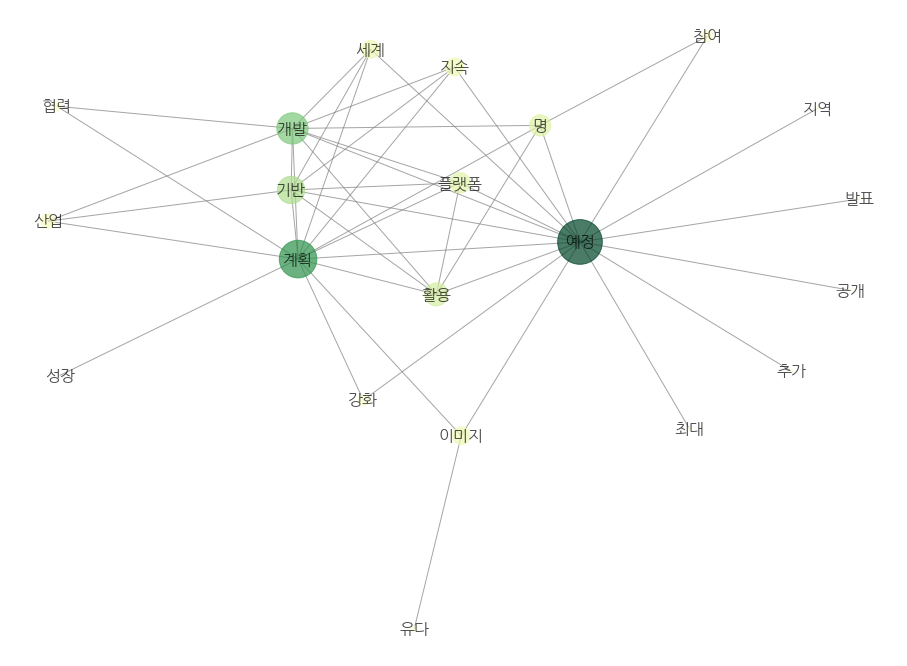

In [262]:
# 그래프
plt.figure(figsize=(16,12))
plt.axis('off')

nx.draw_networkx(G,font_size=16,
                 font_family='NanumGothic', 
                pos=pos, node_color=list(pr.values()),node_size=nsize,
                alpha=0.7,edge_color='.5', cmap=plt.cm.YlGn)

In [ ]:
df01.head()

# 2019년 월간 연관성 분석

In [161]:
df01 = pd.read_csv('./연관성분석/df01.csv', index_col = 0)
df02 = pd.read_csv('./연관성분석/df02.csv', index_col = 0)
df03 = pd.read_csv('./연관성분석/df03.csv', index_col = 0)
df04 = pd.read_csv('./연관성분석/df04.csv', index_col = 0)
df05 = pd.read_csv('./연관성분석/df05.csv', index_col = 0)
df06 = pd.read_csv('./연관성분석/df06.csv', index_col = 0)
df07 = pd.read_csv('./연관성분석/df07.csv', index_col = 0)
df08 = pd.read_csv('./연관성분석/df08.csv', index_col = 0)
df09 = pd.read_csv('./연관성분석/df09.csv', index_col = 0)
df10 = pd.read_csv('./연관성분석/df10.csv', index_col = 0)
df11 = pd.read_csv('./연관성분석/df11.csv', index_col = 0)
df12 = pd.read_csv('./연관성분석/df12.csv', index_col = 0)

## 12월

In [229]:
df07['contents_new'] = df07['contents'].apply(lambda x : kor.nouns(x))
df07['contents_new'] = df07['contents_new'].apply(lambda x : [s for s in x if s not in sw])

In [230]:
contents = [i for i in df07['contents_new']]


In [231]:
te = TransactionEncoder()
te_result = te.fit(contents).transform(contents)

In [232]:
for i in te.columns_:
    i

In [233]:
df=pd.DataFrame(te_result, columns=te.columns_)

In [234]:
# 지지도가 0.08이상인 항목집합만 
itemset = apriori(df, min_support=0.10, use_colnames=True)
itemset['length']= itemset['itemsets'].apply(lambda x: len(x))

df=itemset[(itemset['length'] ==2) & (itemset['support']>=0.08)].sort_values(by='support', ascending=False)

In [235]:
df.describe()

,support,length
count,46.000000,46.0
mean,0.128882,2.0
std,0.025622,0.0
min,0.100414,2.0
25%,0.105590,2.0
50%,0.125259,2.0
75%,0.144928,2.0
max,0.209110,2.0


In [236]:
# itemset = apriori(df, min_support=0.1, use_colnames=True)
# itemset

In [237]:
association_rules(itemset, metric="confidence", min_threshold=0.1).iloc[100:150,:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
100,"(암호화폐, .kr)",(.co),0.144928,0.209110,0.144928,1.000000,4.782178,0.114622,inf
101,(.co),"(암호화폐, .kr)",0.209110,0.144928,0.144928,0.693069,4.782178,0.114622,2.785881
102,(암호화폐),"(.co, .kr)",0.161491,0.209110,0.144928,0.897436,4.291698,0.111158,7.711180
103,(.kr),"(.co, 암호화폐)",0.209110,0.144928,0.144928,0.693069,4.782178,0.114622,2.785881
104,"(개발, 기반)",(활용),0.169772,0.303313,0.104555,0.615854,2.030425,0.053061,1.813599
105,"(개발, 활용)",(기반),0.162526,0.329193,0.104555,0.643312,1.954212,0.051053,1.880657
106,"(기반, 활용)",(개발),0.152174,0.329193,0.104555,0.687075,2.087152,0.054460,2.143667
107,(개발),"(기반, 활용)",0.329193,0.152174,0.104555,0.317610,2.087152,0.054460,1.242436
108,(기반),"(개발, 활용)",0.329193,0.162526,0.104555,0.317610,1.954212,0.051053,1.227266
109,(활용),"(개발, 기반)",0.303313,0.169772,0.104555,0.344710,2.030425,0.053061,1.266962


In [238]:
import re
import networkx as nx

In [239]:
# 그래프
G = nx.Graph()
ar=(df['itemsets']) 
G.add_edges_from(ar)

In [240]:
# 페이지 랭크
pr= nx.pagerank(G)
nsize= np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

In [241]:
# 레이아웃
# pos= nx.spring_layout(G)
# pos= nx.shell_layout(G)
# pos= nx.spectral_layout(G)
# pos= nx.fruchterman_reingold_layout(G)
pos= nx.kamada_kawai_layout(G)
# pos= nx.random_layout(G)


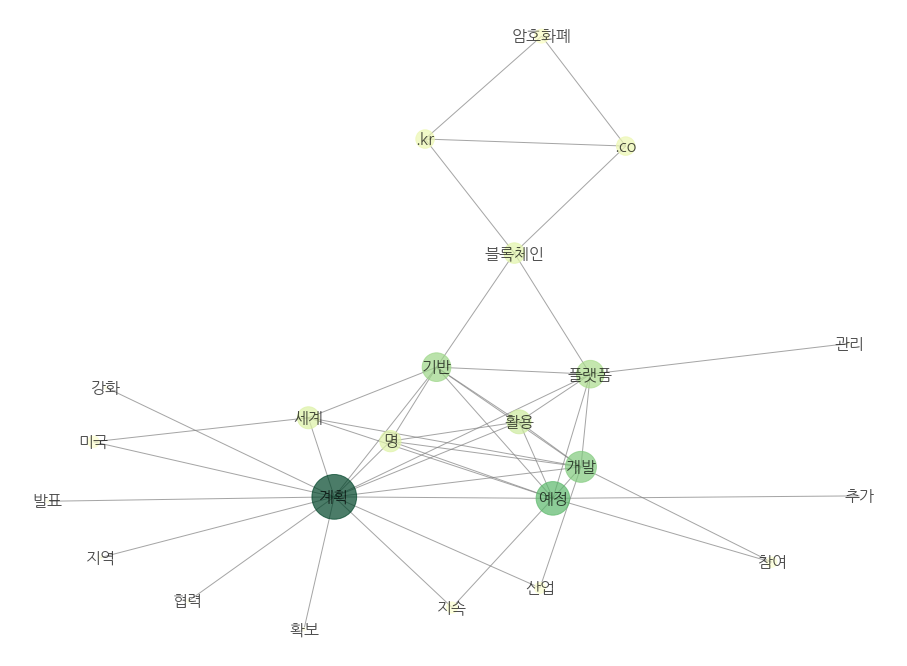

In [242]:
# 그래프
plt.figure(figsize=(16,12))
plt.axis('off')

nx.draw_networkx(G,font_size=16,
                 font_family='NanumGothic', 
                pos=pos, node_color=list(pr.values()),node_size=nsize,
                alpha=0.7,edge_color='.5', cmap=plt.cm.YlGn)

In [ ]:
df12['contents_new'] = df12['contents'].apply(lambda x : kor.nouns(x))
df12['contents_new'] = df12['contents_new'].apply(lambda x : [s for s in x if s not in sw])

In [134]:
for i in os.listdir('./연관성분석'):
    df_m = pd.read_csv('./연관성분석/{}'.format(i))
    
    contents=[]
    
    for j in df_m['contents']:
        
        data = kor.nouns(j)
        
        kor_no = text_clean(data)
        
        clean_text = [token for token in kor_no if token not in sw]
        
        contents.append(clean_text)
        
        te = TransactionEncoder()
        
        te_result = te.fit(df_m['contents']).transform(contents)
        
        df=pd.DataFrame(te_result, columns=te.columns_)
        
        # 지지도가 0.08이상인 항목집합만 
        itemset = apriori(df, min_support=0.08, use_colnames=True)
        itemset['length']= itemset['itemsets'].apply(lambda x: len(x))

        df=itemset[(itemset['length'] >=2) & (itemset['support']>=0.08)].sort_values(by='support', ascending=False)
        
        association_rules(itemset, metric="confidence", min_threshold=0.1) 
        
        # 그래프
        G = nx.Graph()
        ar=(df['itemsets']) 
        G.add_edges_from(ar)
        
        # 페이지 랭크
        pr= nx.pagerank(G)
        nsize= np.array([v for v in pr.values()])
        nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
        
        # 레이아웃
        # pos= nx.spring_layout(G)
        # pos= nx.shell_layout(G)
        # pos= nx.spectral_layout(G)
        # pos= nx.fruchterman_reingold_layout(G)
        pos= nx.kamada_kawai_layout(G)
        # pos= nx.random_layout(G)

        # 그래프
        plt.figure(figsize=(16,12))
        plt.axis('off')

        nx.draw_networkx(G,font_size=16,
                 font_family='NanumGothic', 
                pos=pos, node_color=list(pr.values()),node_size=nsize,
                alpha=0.7,edge_color='.5', cmap=plt.cm.YlGn)
        
        print(i)

TypeError: expected string or bytes-like object

In [23]:
te = TransactionEncoder()
te_result = te.fit(contents).transform(contents)

In [24]:
te.columns_

['가가',
 '가가 국',
 '가가 번',
 '가감',
 '가게',
 '가격 차별',
 '가격 투명성',
 '가격 파괴',
 '가격표',
 '가결',
 '가경',
 '가계부',
 '가계부채',
 '가고시마',
 '가공',
 '가공식품',
 '가공업자',
 '가공품',
 '가관',
 '가교',
 '가구',
 '가구라',
 '가구점',
 '가구주',
 '가금',
 '가까이',
 '가나',
 '가나다순',
 '가나안',
 '가난',
 '가남읍',
 '가네코',
 '가늠',
 '가니',
 '가니쉬',
 '가닥',
 '가담',
 '가담자',
 '가덕도',
 '가도',
 '가독성',
 '가동',
 '가두',
 '가둠',
 '가드',
 '가든',
 '가든파이브',
 '가디',
 '가디건',
 '가디언',
 '가디언스',
 '가디언즈',
 '가라아게',
 '가락',
 '가락동',
 '가람',
 '가렌',
 '가려움증',
 '가로',
 '가로등',
 '가로세로',
 '가로수',
 '가로수길',
 '가루',
 '가루다',
 '가르니에',
 '가르시아',
 '가르침',
 '가마',
 '가마솥',
 '가망',
 '가맹',
 '가맹업',
 '가맹점',
 '가메',
 '가면',
 '가면무도회',
 '가명',
 '가무',
 '가문',
 '가뭄',
 '가미',
 '가바',
 '가발',
 '가방',
 '가변',
 '가변 밸브 타이밍',
 '가보',
 '가부',
 '가부장',
 '가브리엘',
 '가비',
 '가비아',
 '가사',
 '가사도',
 '가산',
 '가산동',
 '가상',
 '가상 공간',
 '가상 머신',
 '가상 세계',
 '가상공간',
 '가상현실',
 '가상화',
 '가석방',
 '가설',
 '가설물',
 '가성',
 '가세',
 '가속',
 '가속기',
 '가속도',
 '가속도계',
 '가속도센서',
 '가솔린',
 '가수',
 '가수왕',
 '가스',
 '가스관',
 '가스레인지',
 '가스실',
 '가슴',
 '가슴팍',
 '가습기',
 '가습기 살균제',
 '가습기

In [42]:
df=pd.DataFrame(te_result, columns=te.columns_)

In [43]:
df

,가가,가가 국,가가 번,가감,가게,가격 차별,가격 투명성,가격 파괴,가격표,가결,...,힐러,힐링,힐스,힐스테이트,힐즈,힐튼,힐튼호텔,힘겨루기,힘찬,힙합
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8824,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8826,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# 지지도가 0.08이상인 항목집합만 
itemset = apriori(df, min_support=0.08, use_colnames=True)
itemset['length']= itemset['itemsets'].apply(lambda x: len(x))

df=itemset[(itemset['length'] >=2) & (itemset['support']>=0.08)].sort_values(by='support', ascending=False)

In [45]:
df.head(10)

,support,itemsets,length
238,0.194721,"(계획, 예정)",2
206,0.160285,"(계획, 개발)",2
216,0.160059,"(예정, 개발)",2
208,0.159606,"(기반, 개발)",2
229,0.152583,"(계획, 기반)",2
267,0.149411,"(예정, 기반)",2
226,0.148731,"(활용, 개발)",2
276,0.148052,"(활용, 기반)",2
328,0.147485,"(활용, 예정)",2
255,0.144767,"(계획, 활용)",2


In [46]:
# itemset = apriori(df, min_support=0.1, use_colnames=True)
# itemset

In [47]:
association_rules(itemset, metric="confidence", min_threshold=0.1) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(강화),(개발),0.221454,0.308450,0.093566,0.422506,1.369771,0.025258,1.197502
1,(개발),(강화),0.308450,0.221454,0.093566,0.303342,1.369771,0.025258,1.117543
2,(계획),(강화),0.364975,0.221454,0.116674,0.319677,1.443535,0.035849,1.144377
3,(강화),(계획),0.221454,0.364975,0.116674,0.526854,1.443535,0.035849,1.342134
4,(기반),(강화),0.305392,0.221454,0.096624,0.316395,1.428712,0.028994,1.138882
...,...,...,...,...,...,...,...,...,...
345,"(활용, 기반)",(예정),0.148052,0.395560,0.080992,0.547054,1.382988,0.022429,1.334466
346,"(예정, 기반)",(활용),0.149411,0.296783,0.080992,0.542077,1.826511,0.036650,1.535668
347,(활용),"(예정, 기반)",0.296783,0.149411,0.080992,0.272901,1.826511,0.036650,1.169839
348,(예정),"(활용, 기반)",0.395560,0.148052,0.080992,0.204754,1.382988,0.022429,1.071301


In [48]:
import re
import networkx as nx

In [64]:
# 그래프
G = nx.Graph()
ar=(df['itemsets']) 
# G.add_edges_from(ar)

In [65]:
# 페이지 랭크
pr= nx.pagerank(G)
nsize= np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

ValueError: min() arg is an empty sequence

In [52]:
# 레이아웃
# pos= nx.spring_layout(G)
# pos= nx.shell_layout(G)
# pos= nx.spectral_layout(G)
# pos= nx.fruchterman_reingold_layout(G)
pos= nx.kamada_kawai_layout(G)
# pos= nx.random_layout(G)


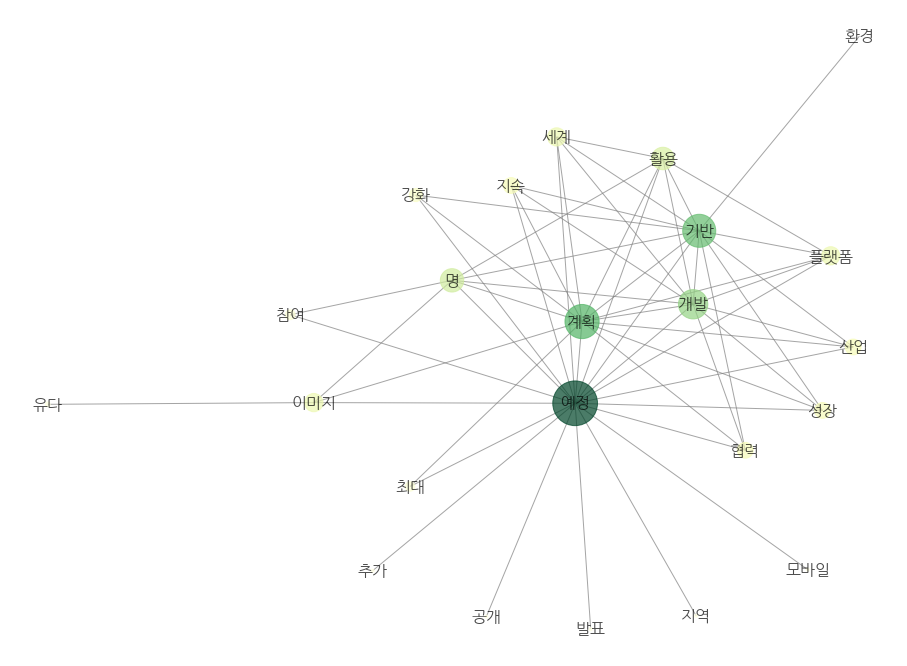

In [56]:
# 그래프
plt.figure(figsize=(16,12))
plt.axis('off')

nx.draw_networkx(G,font_size=16,
                 font_family='NanumGothic', 
                pos=pos, node_color=list(pr.values()),node_size=nsize,
                alpha=0.7,edge_color='.5', cmap=plt.cm.YlGn)